In [ ]:
import pandas as pd

data = pd.read_csv('data_without_null')
data.head()

In [10]:
VD = data.loc[(data['SUBDIVISION'] == 'VIDARBHA')]
VD.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2838,VIDARBHA,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0,1093.3,76.6,64.3,917.2,35.2
2839,VIDARBHA,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7,748.9,1.7,10.6,664.3,72.4
2840,VIDARBHA,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0,1229.4,9.3,40.3,1077.0,102.8
2841,VIDARBHA,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9,753.2,6.7,27.9,655.9,62.7
2842,VIDARBHA,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0,941.8,20.0,42.6,873.1,6.2


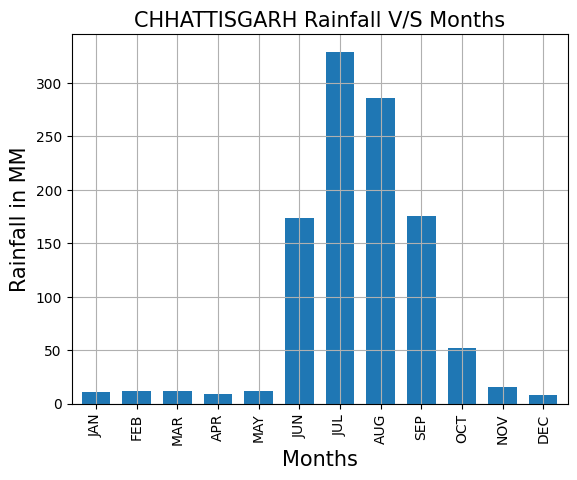

In [12]:
import matplotlib.pyplot as plt

VD[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.7,linewidth=3)
plt.title("VIDARBHA Rainfall V/S Months",size=15)
plt.xlabel("Months",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid(axis="both",linestyle="-")
plt.show()

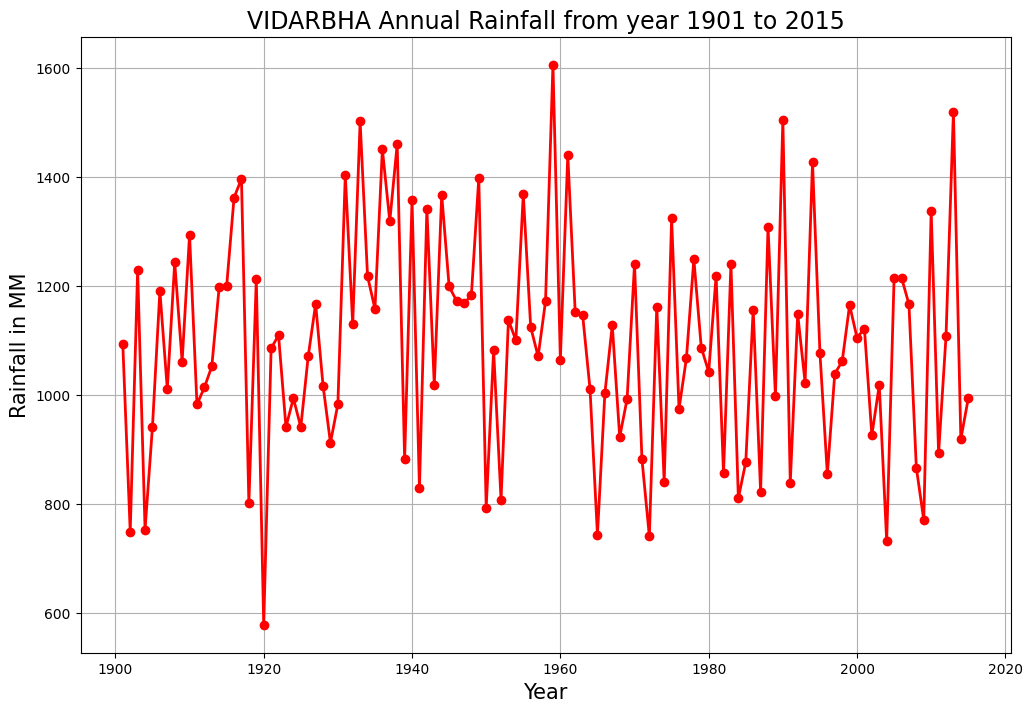

In [14]:
VD.groupby("YEAR").sum()['ANNUAL'].plot(color='r',marker="o",linestyle='-',linewidth=2,figsize=(12,8))
plt.title("VIDARBHA Annual Rainfall from year 1901 to 2015",size=17)
plt.xlabel("Year",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid()
plt.show()

In [15]:
group = data.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
data = group.get_group(('VIDARBHA'))

df = data.melt(['YEAR']).reset_index()

df = df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])

df.columns=['Index','Year','Month','Avg Rainfall']

monthMap = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df['Month'] = df['Month'].map(monthMap)

df.drop(columns="Index",inplace=True)

df.head(10)

,Year,Month,Avg Rainfall
0,1901,1,36.8
115,1901,2,39.9
230,1901,3,30.9
345,1901,4,26.1
460,1901,5,7.3
575,1901,6,129.7
690,1901,7,295.3
805,1901,8,368.8
920,1901,9,123.4
1035,1901,10,35.2


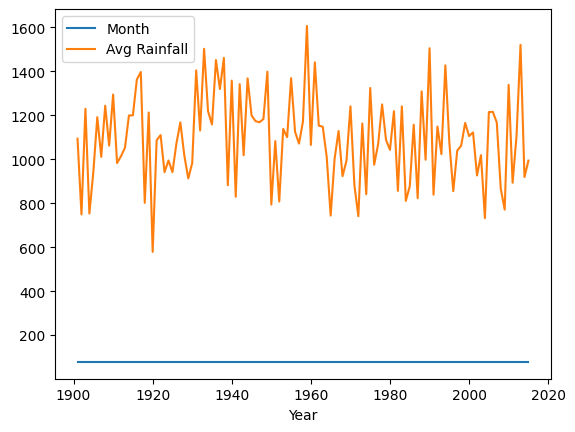

In [16]:
df.groupby("Year").sum().plot()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_5672\4153292416.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg Rainfall'])


<Axes: ylabel='Avg Rainfall'>

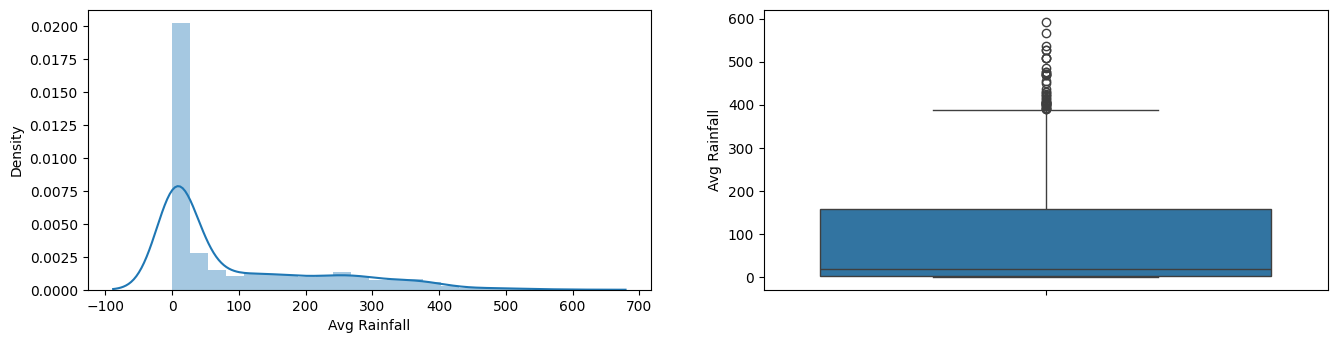

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg Rainfall'])

In [19]:
percentile25 = df['Avg Rainfall'].quantile(0.25)
percentile75 = df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Avg Rainfall'] > upper_limit]
df[df['Avg Rainfall'] < lower_limit]

new_df = df[df['Avg Rainfall'] < upper_limit]
new_df.shape

(1340, 3)

In [20]:
percentile25 = new_df['Avg Rainfall'].quantile(0.25)
percentile75 = new_df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df[new_df['Avg Rainfall'] > upper_limit]
new_df[new_df['Avg Rainfall'] < lower_limit]

new_df2 = new_df[new_df['Avg Rainfall'] < upper_limit]
new_df2.shape

(1291, 3)

In [22]:
percentile25 = new_df2['Avg Rainfall'].quantile(0.25)
percentile75 = new_df2['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df2[new_df2['Avg Rainfall'] > upper_limit]
new_df2[new_df2['Avg Rainfall'] < lower_limit]

new_df3 = new_df2[new_df2['Avg Rainfall'] < upper_limit]
new_df3.shape

(1244, 3)

In [23]:
percentile25 = new_df3['Avg Rainfall'].quantile(0.25)
percentile75 = new_df3['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df3[new_df3['Avg Rainfall'] > upper_limit]
new_df3[new_df3['Avg Rainfall'] < lower_limit]

new_df4 = new_df3[new_df3['Avg Rainfall'] < upper_limit]
new_df4.shape

(1155, 3)

In [24]:
percentile25 = new_df4['Avg Rainfall'].quantile(0.25)
percentile75 = new_df4['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df4[new_df4['Avg Rainfall'] > upper_limit]
new_df4[new_df4['Avg Rainfall'] < lower_limit]

new_df5 = new_df4[new_df4['Avg Rainfall'] < upper_limit]
new_df5.shape

(1021, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5672\3776872767.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df4['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_5672\3776872767.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df5['Avg Rainfall'])


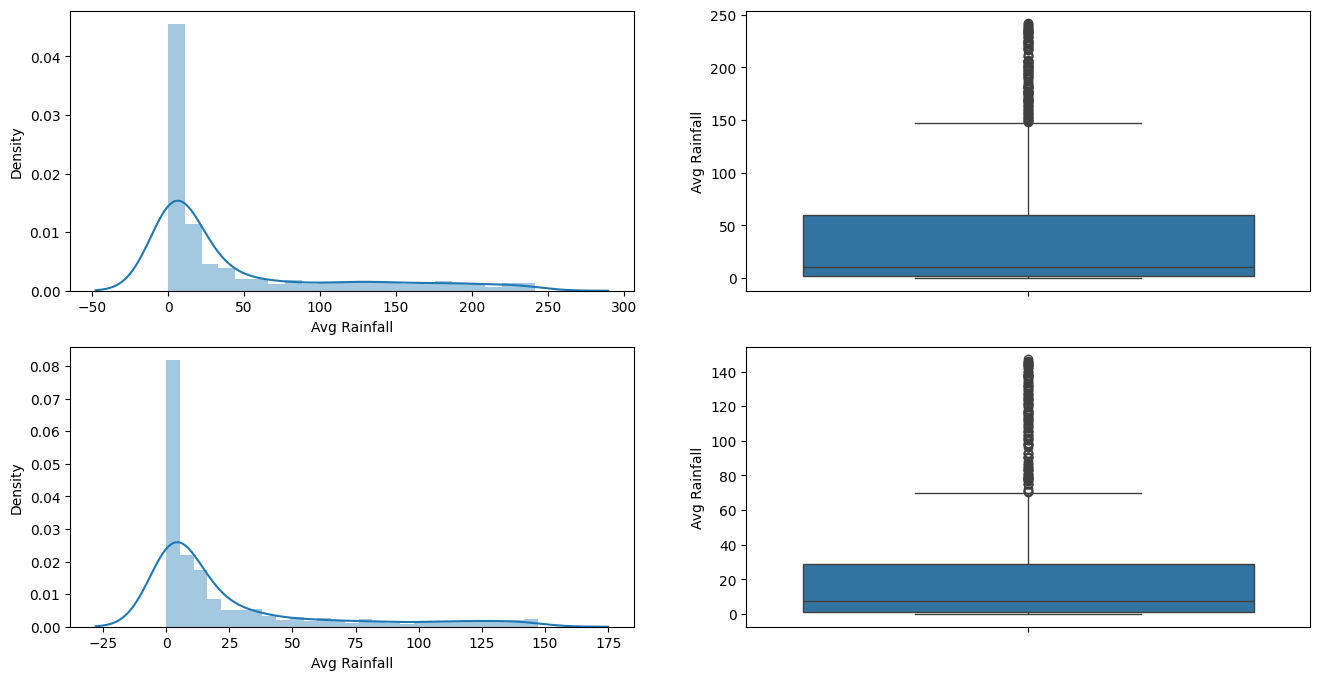

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df4['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df4['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df5['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df5['Avg Rainfall'])
plt.show()

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asanyarray(new_df5[['Year','Month']]).astype('int')
Y = np.asanyarray(new_df5['Avg Rainfall']).astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape)
print(Y.shape)

(1021, 2)
(1021,)


In [29]:
new_df5.head(10)

,Year,Month,Avg Rainfall
0,1901,1,36.8
115,1901,2,39.9
230,1901,3,30.9
345,1901,4,26.1
460,1901,5,7.3
575,1901,6,129.7
920,1901,9,123.4
1035,1901,10,35.2
1150,1901,11,0.0
1265,1901,12,0.0


In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, Y_train)

y_train_predict = knn_model.predict(X_train)
y_test_predict = knn_model.predict(X_test)

predicted = knn_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value : ", predicted)

R-squared score on training data: 0.5035749807704709
R-squared score on test data: 0.052069129962663
Predicted value :  [22.]


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

random_forest_model = RandomForestRegressor(n_estimators=50, random_state=45)
random_forest_model.fit(X_train, Y_train)

y_train_predict = random_forest_model.predict(X_train)
y_test_predict = random_forest_model.predict(X_test)

predicted = random_forest_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value ", predicted)

R-squared score on training data: 0.9302196318789395
R-squared score on test data: 0.39623440768914164
Predicted value  [31.76]


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)
y_test_predict = linear_model.predict(X_test)

predicted = linear_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)
test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted)

R-squared score on training data: 0.04195994519047608
R-squared score on test data: 0.01649745857768703
Predicted value: [12.51743578]


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision_tree_model = DecisionTreeRegressor(random_state=45)
decision_tree_model.fit(X_train, Y_train)

y_train_predict = decision_tree_model.predict(X_train)
y_test_predict = decision_tree_model.predict(X_test)

predicted = decision_tree_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted[0])

R-squared score on training data: 1.0
R-squared score on test data: 0.15937321778586322
Predicted value: 36.0


In [34]:
import pickle

pickle.dump(decision_tree_model,open('vd_decesion_tree_model.pkl','wb'))
pickel_model = pickle.load(open('vd_decesion_tree_model.pkl','rb'))

pickel_model.predict([[1901, 1]])

array([36.])